# CPC251 Machine Learning and Computational Intelligence
## Mini Project (Cardiotocography)
## Group 3_Cardio
### Group members:
### 1. FARZANA AMIRAH BINTI FAUZI AL-AQSA
### 2. NOOR MAISARAH BINTI GHAZALI
### 3. SITI SAKINAH BINTI AHMAD SANUSI
### 4. TEOH SIN YEE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

import tkinter
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

import skfuzzy as fuzzy
from skfuzzy import control as ctrl

cardio = pd.read_csv('Cardiotocography/ctg.csv', sep=';',skipfooter=3)

### Feature Selection using Wrapper Method

In [2]:
cardio.head(2)

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120,0,0,0,73,0.5,43,2.4,0,0,...,126,2,0,120,137,121,73,1,9,2
1,132,4,0,4,17,2.1,0,10.4,2,0,...,198,6,1,141,136,140,12,0,6,1


In [3]:
cardio.keys()

Index(['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS',
       'DP', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median',
       'Variance', 'Tendency', 'CLASS', 'NSP'],
      dtype='object')

In [4]:
cardio.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120,0,0,0,73,0.5,43,2.4,0,0,...,126,2,0,120,137,121,73,1,9,2
1,132,4,0,4,17,2.1,0,10.4,2,0,...,198,6,1,141,136,140,12,0,6,1
2,133,2,0,5,16,2.1,0,13.4,2,0,...,198,5,1,141,135,138,13,0,6,1
3,134,2,0,6,16,2.4,0,23.0,2,0,...,170,11,0,137,134,137,13,1,6,1
4,132,4,0,5,16,2.4,0,19.9,0,0,...,170,9,0,137,136,138,11,1,2,1


In [5]:
X = cardio
X = cardio.drop("NSP", axis=1)
y = cardio["NSP"]
X.isnull().sum()
y

0       2
1       1
2       1
3       1
4       1
       ..
2121    2
2122    2
2123    2
2124    2
2125    1
Name: NSP, Length: 2126, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape, y_test, y_train

((1488, 22),
 (638, 22),
 658     1
 1734    1
 1226    1
 1808    1
 825     2
        ..
 1934    1
 1644    1
 1786    1
 1421    1
 89      2
 Name: NSP, Length: 638, dtype: int64,
 994     1
 1618    1
 177     1
 519     1
 745     1
        ..
 1033    1
 1731    1
 763     1
 835     1
 1653    1
 Name: NSP, Length: 1488, dtype: int64)

#### In wrapper methods, the feature selection process is based on a specific machine learning algorithm that we are trying to fit on the dataset. It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion.
#### 3 features are selected from 22 features

In [7]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs =-1),
         k_features = 3,
          forward=True,
          floating = False,
          verbose=2,
          scoring = 'accuracy',
          cv = 4,
          n_jobs=-1
         ).fit(X_train.fillna(1), y_train.fillna(1))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  22 | elapsed:    8.0s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    8.0s finished

[2021-07-04 16:16:12] Features: 1/3 -- score: 0.9865591397849462[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:    3.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    3.3s finished

[2021-07-04 16:16:16] Features: 2/3 -- score: 0.9899193548387097[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    2.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.5s finished

[2021-07-04 16:16:19] Features: 3/3 -- score: 0.989247311827957

#### The following are the features selected:
#### 1. DS
#### 2. Width
#### 3. CLASS

In [8]:
sfs.k_feature_names_

('DS', 'Width', 'CLASS')

In [9]:
sfs.k_feature_idx_

(9, 11, 21)

In [10]:
sfs.k_score_

0.989247311827957

In [11]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(21,)","[0.989247311827957, 0.9865591397849462, 0.9811...",0.986559,"(CLASS,)",0.00527754,0.00329232,0.00190082
2,"(11, 21)","[0.9919354838709677, 0.9919354838709677, 0.983...",0.989919,"(Width, CLASS)",0.00559767,0.00349204,0.00201613
3,"(9, 11, 21)","[0.9919354838709677, 0.9919354838709677, 0.983...",0.989247,"(DS, Width, CLASS)",0.00527754,0.00329232,0.00190082


In [12]:
sfs.k_feature_names_

('DS', 'Width', 'CLASS')

### 1. SVM model to predict the target variable

In [13]:
cardio.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120,0,0,0,73,0.5,43,2.4,0,0,...,126,2,0,120,137,121,73,1,9,2
1,132,4,0,4,17,2.1,0,10.4,2,0,...,198,6,1,141,136,140,12,0,6,1
2,133,2,0,5,16,2.1,0,13.4,2,0,...,198,5,1,141,135,138,13,0,6,1
3,134,2,0,6,16,2.4,0,23.0,2,0,...,170,11,0,137,134,137,13,1,6,1
4,132,4,0,5,16,2.4,0,19.9,0,0,...,170,9,0,137,136,138,11,1,2,1


In [14]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   int64  
 2   FM        2126 non-null   int64  
 3   UC        2126 non-null   int64  
 4   ASTV      2126 non-null   int64  
 5   MSTV      2126 non-null   float64
 6   ALTV      2126 non-null   int64  
 7   MLTV      2126 non-null   float64
 8   DL        2126 non-null   int64  
 9   DS        2126 non-null   int64  
 10  DP        2126 non-null   int64  
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

In [15]:
cardio.describe()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,2.722484,7.241298,3.659925,46.990122,1.332785,9.84666,8.187629,1.570085,0.003293,...,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,4.509878,1.304327
std,9.840844,3.560850,37.125309,2.847094,17.192814,0.883241,18.39688,5.628247,2.499229,0.057300,...,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,3.026883,0.614377
min,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,0.000000,0.000000,...,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000,1.000000
25%,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,0.00000,4.600000,0.000000,0.000000,...,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,2.000000,1.000000
50%,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,0.00000,7.400000,0.000000,0.000000,...,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,4.000000,1.000000
75%,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,11.00000,10.800000,3.000000,0.000000,...,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,7.000000,1.000000
max,160.000000,26.000000,564.000000,23.000000,87.000000,7.000000,91.00000,50.700000,16.000000,1.000000,...,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,10.000000,3.000000


#### Check if there is any NaN value or not

In [16]:
cardio_nan = cardio[cardio.isnull().any(axis=1)]
cardio_nan.head(10)

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP


#### drop the NaN values in the dataset

In [17]:
cardio_final = cardio.dropna(axis=0)
cardio_final[cardio_final.isnull().any(axis=1)]

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP


#### Fit the dataset

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
y = cardio_final['NSP']
X = cardio_final.drop(columns='NSP')
cols = ['DP', 'Width', 'CLASS']
X = cardio_final[cols]
scaler = StandardScaler()
X_transform = scaler.fit_transform(X)

#### Split the dataset into training, testing and validation set

In [19]:
from sklearn.model_selection import train_test_split
seed_num = 80
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.3, random_state=seed_num)
# random_state is set to a value for reproducible output.
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed_num)
print(X_train.shape)
#print(X_val.shape)
print(X_test.shape)

(1488, 3)
(638, 3)


#### SVC with linear kernel

In [20]:
from sklearn.svm import SVC
C = 0.1
model_svc = SVC(kernel='linear', C=C)
model_svc.fit(X_train, y_train)


SVC(C=0.1, kernel='linear')

In [21]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
y_pred = model_svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.9153605015673981
[[491   0   0]
 [ 24  64   1]
 [  4  25  29]]
              precision    recall  f1-score   support

           1       0.95      1.00      0.97       491
           2       0.72      0.72      0.72        89
           3       0.97      0.50      0.66        58

    accuracy                           0.92       638
   macro avg       0.88      0.74      0.78       638
weighted avg       0.92      0.92      0.91       638



#### The accuracy and f1 score of linear kernel (in percentage)

In [22]:
print('Accuracy (Linear Kernel): ', "%.2f" % (accuracy_score(y_test, y_pred)*100))
print('F1 (Linear Kernel): ', "%.2f" % (f1_score(y_test, y_pred, average='weighted')*100))

Accuracy (Linear Kernel):  91.54
F1 (Linear Kernel):  90.85


#### The prediction are presented in the graphs below:

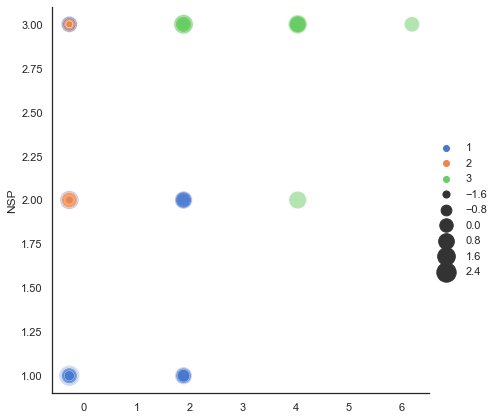

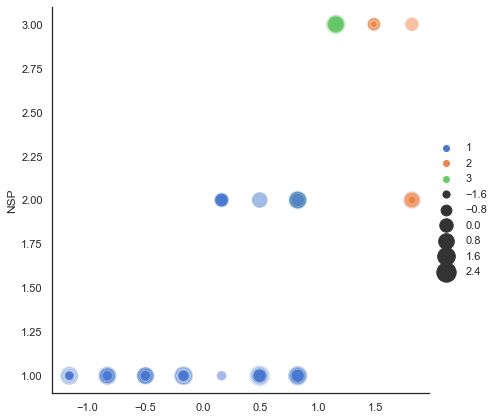

In [23]:
import seaborn as sns
sns.set_theme(style="white")

sns.relplot(x=X_test[:,0], y=y_test, hue=y_pred, size=X_test[:,1],
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=y_test)

sns.relplot(x=X_test[:,2], y=y_test, hue=y_pred, size=X_test[:,1],
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=y_test)

#### As we can see in the graphs above, the first graph is 'DP vs NSP' while the second graph is 'CLASS vs NSP'. Each color represent the NSP. 1 is blue, 2 is orange and 3 is green. The size of the dots represent the width.

#### SVC with sigmoid kernel

In [24]:
#sigmoid
model_svc_sig = SVC(kernel='sigmoid',gamma='scale', coef0=1, C=C)
model_svc_sig.fit(X_train, y_train)
y_pred = model_svc_sig.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.768025078369906
[[480   6   5]
 [ 81   7   1]
 [ 52   3   3]]
              precision    recall  f1-score   support

           1       0.78      0.98      0.87       491
           2       0.44      0.08      0.13        89
           3       0.33      0.05      0.09        58

    accuracy                           0.77       638
   macro avg       0.52      0.37      0.36       638
weighted avg       0.69      0.77      0.70       638



#### The accuracy and f1 score of Sigmoid kernel (in percentage)

In [25]:
print('Accuracy (Sigmoid Kernel): ', "%.2f" % (accuracy_score(y_test, y_pred)*100))
print('F1 (Sigmoid Kernel): ', "%.2f" % (f1_score(y_test, y_pred, average='weighted')*100))

Accuracy (Sigmoid Kernel):  76.80
F1 (Sigmoid Kernel):  69.60


#### The prediction are presented in the graphs below:

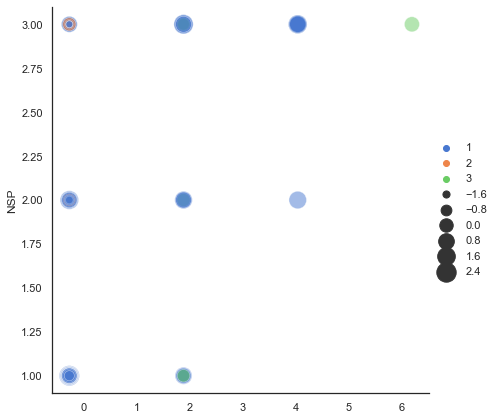

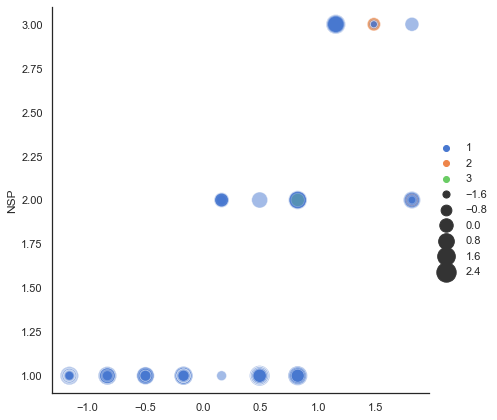

In [26]:
sns.relplot(x=X_test[:,0], y=y_test, hue=y_pred, size=X_test[:,1],
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=y_test)

sns.relplot(x=X_test[:,2], y=y_test, hue=y_pred, size=X_test[:,1],
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=y_test)

#### As we can see in the graphs above, the first graph is 'DP vs NSP' while the second graph is 'CLASS vs NSP'. Each color represent the NSP. 1 is blue, 2 is orange and 3 is green. The size of the dots represent the width.

#### SVC with polynomial kernel

In [27]:
model_svc_poly = SVC(kernel='poly', degree=2, gamma='scale', coef0=1, C=C)
model_svc_poly.fit(X_train, y_train)
y_pred = model_svc_poly.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9169278996865203
[[491   0   0]
 [ 23  65   1]
 [  4  25  29]]
              precision    recall  f1-score   support

           1       0.95      1.00      0.97       491
           2       0.72      0.73      0.73        89
           3       0.97      0.50      0.66        58

    accuracy                           0.92       638
   macro avg       0.88      0.74      0.79       638
weighted avg       0.92      0.92      0.91       638



#### The accuracy and f1 score of polynomial kernel (in percentage)

In [28]:
print('Accuracy (Polynomial Kernel): ', "%.2f" % (accuracy_score(y_test, y_pred)*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (f1_score(y_test, y_pred, average='weighted')*100))

Accuracy (Polynomial Kernel):  91.69
F1 (Polynomial Kernel):  91.02


#### The prediction are presented in the graphs below:

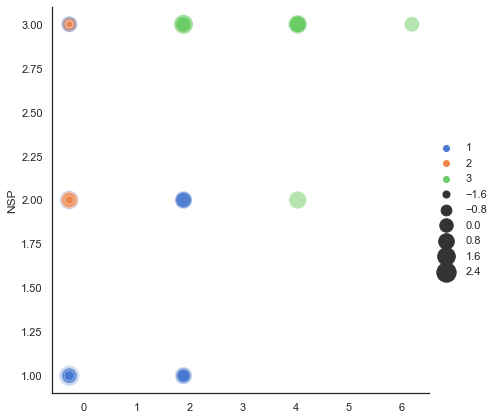

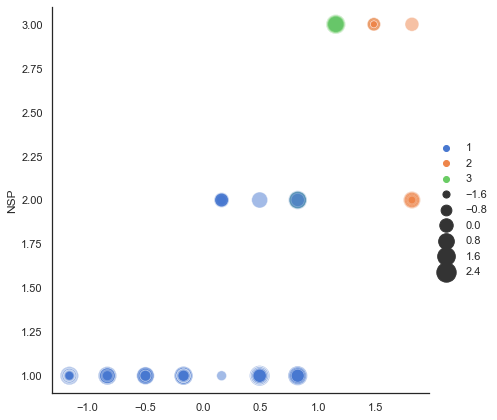

In [29]:
sns.relplot(x=X_test[:,0], y=y_test, hue=y_pred, size=X_test[:,1],
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=y_test)

sns.relplot(x=X_test[:,2], y=y_test, hue=y_pred, size=X_test[:,1],
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=y_test)

#### As we can see in the graphs above, the first graph is 'DP vs NSP' while the second graph is 'CLASS vs NSP'. Each color represent the NSP. 1 is blue, 2 is orange and 3 is green. The size of the dots represent the width.

In [30]:
model_svc_rbf = SVC(kernel='rbf', gamma='scale', C=C)
model_svc_rbf.fit(X_train, y_train)
y_pred = model_svc_rbf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9028213166144201
[[491   0   0]
 [ 23  65   1]
 [ 13  25  20]]
              precision    recall  f1-score   support

           1       0.93      1.00      0.96       491
           2       0.72      0.73      0.73        89
           3       0.95      0.34      0.51        58

    accuracy                           0.90       638
   macro avg       0.87      0.69      0.73       638
weighted avg       0.90      0.90      0.89       638



#### The accuracy and f1 score of RBF kernel (in percentage)

In [31]:
print('Accuracy (RBF Kernel): ', "%.2f" % (accuracy_score(y_test, y_pred)*100))
print('F1 (RBF Kernel): ', "%.2f" % (f1_score(y_test, y_pred, average='weighted')*100))

Accuracy (RBF Kernel):  90.28
F1 (RBF Kernel):  88.97


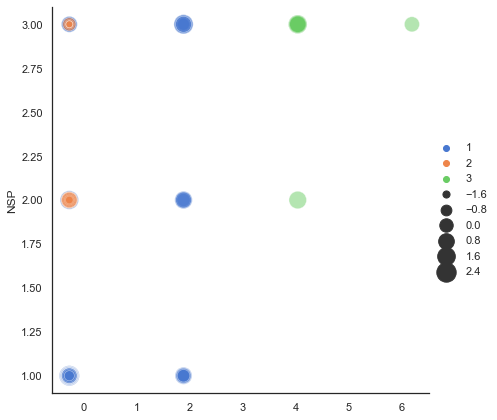

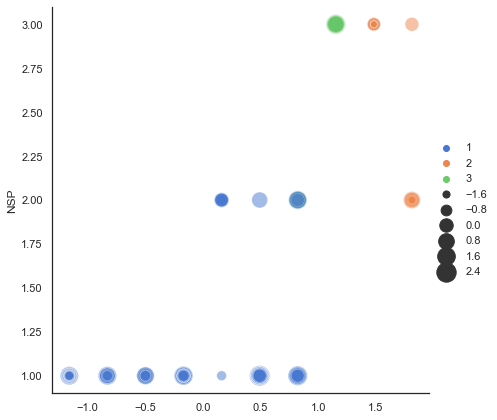

In [32]:
sns.relplot(x=X_test[:,0], y=y_test, hue=y_pred, size=X_test[:,1],
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=y_test)

sns.relplot(x=X_test[:,2], y=y_test, hue=y_pred, size=X_test[:,1],
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=y_test)

### Feature selection using wrapper method

In [33]:
X = cardio
X = cardio.drop("NSP", axis=1)
y = cardio["NSP"]
X.isnull().sum()

LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
CLASS       0
dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((1488, 22), (638, 22))

#### 4 features are selected from 22 features

In [35]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs =-1),
         k_features = 4,
          forward=True,
          floating = False,
          verbose=2,
          scoring = 'accuracy',
          cv = 4,
          n_jobs=-1
         ).fit(X_train.fillna(1), y_train.fillna(1))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  22 | elapsed:    4.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    4.3s finished

[2021-07-04 16:16:32] Features: 1/4 -- score: 0.9865591397849462[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:    4.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    4.7s finished

[2021-07-04 16:16:37] Features: 2/4 -- score: 0.9899193548387097[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    3.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.2s finished

[2021-07-04 16:16:41] Features: 3/4 -- score: 0.989247311827957[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  19 | e

In [36]:
sfs.k_feature_names_

('DS', 'Width', 'Median', 'CLASS')

In [37]:
sfs.k_feature_idx_

(9, 11, 18, 21)

In [38]:
sfs.k_score_

0.9905913978494624

In [39]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(21,)","[0.989247311827957, 0.9865591397849462, 0.9811...",0.986559,"(CLASS,)",0.00527754,0.00329232,0.00190082
2,"(11, 21)","[0.9919354838709677, 0.9919354838709677, 0.983...",0.989919,"(Width, CLASS)",0.00559767,0.00349204,0.00201613
3,"(9, 11, 21)","[0.9919354838709677, 0.9919354838709677, 0.983...",0.989247,"(DS, Width, CLASS)",0.00527754,0.00329232,0.00190082
4,"(9, 11, 18, 21)","[0.9919354838709677, 0.9919354838709677, 0.989...",0.990591,"(DS, Width, Median, CLASS)",0.00215454,0.00134409,0.000776008


#### The following are the features selected:
#### 1. DS
#### 2. Width
#### 3. Median
#### 4. CLASS

In [40]:
sfs.k_feature_names_

('DS', 'Width', 'Median', 'CLASS')

In [41]:
cardio[['DP','Width','Max','NSP']]

,DP,Width,Max,NSP
0,0,64,126,2
1,0,130,198,1
2,0,130,198,1
3,0,117,170,1
4,0,117,170,1
...,...,...,...,...
2121,0,40,177,2
2122,0,66,169,2
2123,0,67,170,2
2124,0,66,169,2


### 2. Fuzzy logic model to predict the target variable
#### Creating the Tipping Controller Using the skfuzzy control API

#### New Antecedent/Consequent objects hold universe variables and membership functions

In [42]:
DP = ctrl.Antecedent(np.arange(0,5,1),'DP')
Width = ctrl.Antecedent(np.arange(3,181,1),'Width')
Max = ctrl.Antecedent(np.arange(122,239,1),'Max')
NSP = ctrl.Consequent(np.arange(0,4,1),'NSP')

#### Custom membership functions can be built interactively with a familiar, Pythonic API

In [43]:
DP['Normal'] = fuzzy.trimf(DP.universe, [0,0,1])
DP['Abnormal'] = fuzzy.trapmf(DP.universe, [1,2,4,4])

Width['Low'] = fuzzy.trimf(Width.universe, [3,32.5,62])
Width['Average'] = fuzzy.trimf(Width.universe, [62,91.5,121])
Width['High'] = fuzzy.trimf(Width.universe, [121,150.5,180])

Max['Low'] = fuzzy.trimf(Max.universe, [122,141,160])
Max['Average'] = fuzzy.trimf(Max.universe, [160,179,198])
Max['High'] = fuzzy.trimf(Max.universe, [198,218,238])

NSP['Normal'] = fuzzy.trimf(NSP.universe, [0,0,1])
NSP['Suspect'] = fuzzy.trimf(NSP.universe, [0,1,3])
NSP['Pathologic'] = fuzzy.trimf(NSP.universe, [1,3,3])

#### To help understand what the membership looks like, use the view methods.

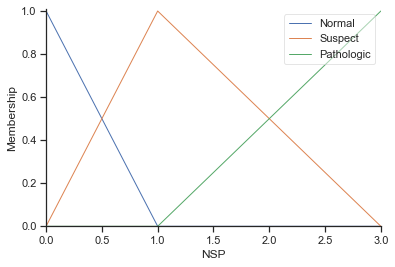

In [44]:
%matplotlib inline
NSP.view()

#### Fuzzy rules
#### Now, to make these triangles useful, we define the fuzzy relationship between input and output variables.
#### Most people would agree on these rules, but the rules are fuzzy. Mapping the imprecise rules into a defined, actionable tip is a challenge. This is the kind of task at which fuzzy logic excels.

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

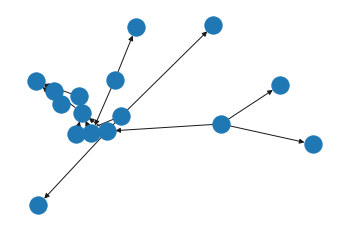

In [45]:
rule1 = ctrl.Rule(DP['Normal'] | Width['Average'] | Max['High'], NSP['Normal'])
rule2 = ctrl.Rule(DP['Abnormal'] | Width['High'] |Max['High'], NSP['Pathologic'])
rule3 = ctrl.Rule(DP['Normal'] | Width['Low'] | Max['Average'], NSP['Pathologic'])
rule1.view()

#### Control System Creation and Simulation
#### Now that we have our rules defined, we can simply create a control system via:

In [46]:
NSP_CTRL = ctrl.ControlSystem([rule1, rule2, rule3])

#### In order to simulate this control system, we will create a ControlSystemSimulation.

In [47]:
NSP_PREDICT = ctrl.ControlSystemSimulation(NSP_CTRL)

#### We can now simulate our control system by simply specifying the inputs and calling the compute method.

In [48]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
NSP_PREDICT.input['DP'] = 1
NSP_PREDICT.input['Width'] = 170
NSP_PREDICT.input['Max'] = 200

# Crunch the numbers
NSP_PREDICT.compute()

#### Once computed, we can view the result.

In [49]:
if 0 <= NSP_PREDICT.output['NSP'] < 1: 	
    print ("Normal" )
elif 1 <= NSP_PREDICT.output['NSP'] < 2:
    print ("Suspect")
else: 	print ("Pathologic")


print (NSP_PREDICT.output['NSP'])

Suspect
1.9150649416184513


In [1]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [2]:
y_true = [1, 1, 2, 3, 3]
y_pred = [1, 1, 2, 2, 2]

In [3]:
recall_score(y_true, y_pred, average='macro')

0.6666666666666666

In [4]:
precision_score(y_true, y_pred, average='micro')

0.6

In [5]:
f1_score(y_true, y_pred, average='micro')

0.6